In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Data Quality Report

In [2]:
b = df.columns

a = [len(df[b[i]].unique()) for i in range (len(b))]
Missing_values = df.isnull().sum()
m = [df[b[i]].max() for i in range (len(b))]
n = [df[b[i]].min() for i in range (len(b))]


type = pd.DataFrame(df.dtypes, columns= ['type'])
Missing_values = pd.DataFrame(Missing_values, columns=['Missing_Values'])
Unique_Values = pd.DataFrame(a,b, columns = ['Unique_Values'])
Maximum_values = pd.DataFrame(m,b, columns = ['Maximum_values'])
Minimum_values = pd.DataFrame(n,b, columns = ['Minimum_values'])


dq_report = type.join(Unique_Values).join(Missing_values).join(Maximum_values).join(Minimum_values)
dq_report

,type,Unique_Values,Missing_Values,Maximum_values,Minimum_values
age,float64,47,0,95.0,40.0
anaemia,int64,2,0,1.0,0.0
creatinine_phosphokinase,int64,208,0,7861.0,23.0
diabetes,int64,2,0,1.0,0.0
ejection_fraction,int64,17,0,80.0,14.0
high_blood_pressure,int64,2,0,1.0,0.0
platelets,float64,176,0,850000.0,25100.0
serum_creatinine,float64,40,0,9.4,0.5
serum_sodium,int64,27,0,148.0,113.0
sex,int64,2,0,1.0,0.0


# Feature Selection

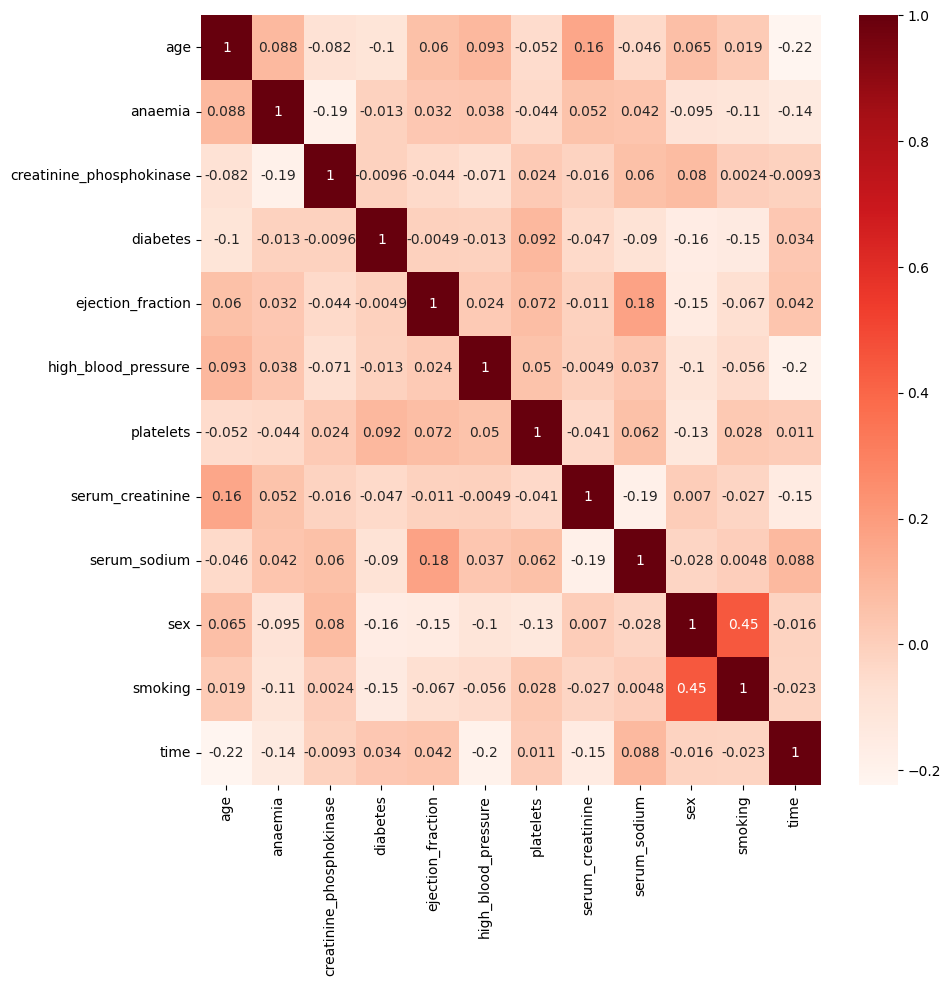

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df.iloc[:,:-1].corr(),cmap='Reds',annot=True, ax=ax)

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = df.iloc[:,:-1]
y = df['DEATH_EVENT']

scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


# Balancing dataset

In [6]:
x['DEATH_EVENT'] = df['DEATH_EVENT']
x['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [7]:
count_0, count_1 = x['DEATH_EVENT'].value_counts()

df_class_0 = x[x['DEATH_EVENT']==0]
df_class_1 = x[x['DEATH_EVENT']==1]

class_0_ = df_class_0
class_1_ = df_class_1.sample(count_0, replace=True)

df_balanced= pd.concat([class_0_,class_1_], axis=0)
df_balanced['DEATH_EVENT'].value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

# Preparing for model

In [8]:
from sklearn.model_selection import train_test_split

X = df_balanced.iloc[:,:-1]
y = df_balanced['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Selection

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
mlp = MLPClassifier()
svm = svm.SVC()
xgb = xgb.XGBClassifier(objective='binary:logistic')
NB = GaussianNB()
lg = LogisticRegression()

In [12]:
from sklearn.model_selection import cross_val_score

kf_cv_rf = cross_val_score(rf, x_train, y_train, scoring='accuracy', cv=10)
kf_cv_xgb = cross_val_score(xgb, x_train, y_train, scoring='accuracy', cv=10)
dt_cv = cross_val_score(dt, x_train, y_train, scoring='accuracy', cv=10)
mlp_cv = cross_val_score(mlp, x_train, y_train, scoring='accuracy', cv=10)
svm_cv = cross_val_score(svm, x_train, y_train, scoring='accuracy', cv=10)
NB_cv = cross_val_score(NB, x_train, y_train, scoring='accuracy', cv=10)
lg_cv = cross_val_score(lg, x_train, y_train, scoring='accuracy', cv=10)

In [13]:
print('Acc RF:',kf_cv_rf.mean())
print('Range RF:',kf_cv_rf)
print('--------------------------')
print('Acc XGB:',kf_cv_xgb.mean())
print('Range XGB:',kf_cv_xgb)
print('--------------------------')
print('Acc DT:',dt_cv.mean())
print('Range DT:',dt_cv)
print('--------------------------')
print('Acc MLP:',mlp_cv.mean())
print('Range MLP:',mlp_cv)
print('--------------------------')
print('Acc SVC:',svm_cv.mean())
print('Range SVC:',svm_cv)
print('--------------------------')
print('Acc NB:',NB_cv.mean())
print('Range NB:',NB_cv)
print('--------------------------')
print('Acc LG:',lg_cv.mean())
print('Range LG:',lg_cv)

Acc RF: 0.887807881773399
Range RF: [0.89655172 0.93103448 0.79310345 0.79310345 0.85714286 0.92857143
 0.89285714 0.96428571 0.89285714 0.92857143]
--------------------------
Acc XGB: 0.8770935960591133
Range XGB: [0.89655172 0.96551724 0.79310345 0.75862069 0.85714286 0.96428571
 0.92857143 0.89285714 0.85714286 0.85714286]
--------------------------
Acc DT: 0.8524630541871921
Range DT: [0.72413793 0.96551724 0.82758621 0.79310345 0.82142857 0.89285714
 0.82142857 0.92857143 0.85714286 0.89285714]
--------------------------
Acc MLP: 0.7960591133004926
Range MLP: [0.82758621 0.82758621 0.72413793 0.72413793 0.78571429 0.85714286
 0.78571429 0.89285714 0.75       0.78571429]
--------------------------
Acc SVC: 0.7604679802955665
Range SVC: [0.75862069 0.82758621 0.75862069 0.72413793 0.67857143 0.85714286
 0.75       0.82142857 0.78571429 0.64285714]
--------------------------
Acc NB: 0.7359605911330049
Range NB: [0.72413793 0.62068966 0.75862069 0.82758621 0.64285714 0.67857143
 0.75 

## Model

In [14]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_cl=xgb.XGBClassifier(objective='binary:logistic')
xgb_cl.fit(x_train, y_train)

y_pred_xgb = xgb_cl.predict(x_test)

print('Accuracy for XGB:', xgb_cl.score(x_test, y_test))

print(classification_report(y_test, y_pred_xgb))

Accuracy for XGB: 0.9344262295081968
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.93      0.93      0.93        60

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122



## Learning Curve

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(xgb_cl, X, y, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

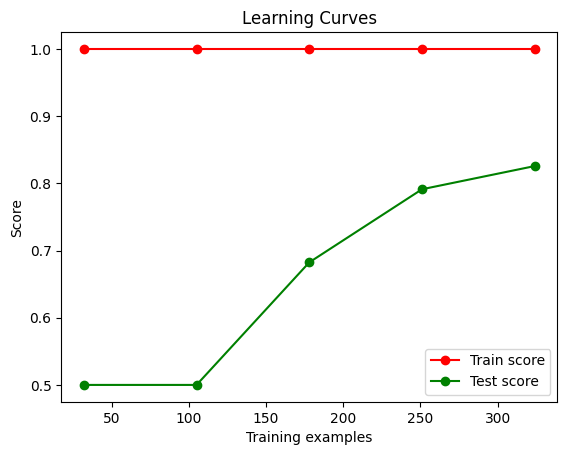

In [16]:
train_scores_mean=np.mean(train_scores, axis=1)
test_scores_mean=np.mean(test_scores, axis=1)

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
    
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Train score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test score')
    
plt.legend(loc='best')
    
plt.show()

# Evaluation

In [18]:
from sklearn.metrics import recall_score

print('Recall Score for the XGBoost(Extreme grtadient boost):', recall_score(y_test, y_pred_xgb))

Recall Score for the XGBoost(Extreme grtadient boost): 0.9333333333333333
